In [29]:
import becquerel as bq
import pandas as pd
from becquerel import Spectrum
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math as m

In [5]:
import analysis_methods as am

In [2]:
def gaussian(x):
    return (spec.livetime * amp /(m.sqrt(2*m.pi)*sigma)) * m.exp(- ((x-mu)**2) / (2*sigma**2))

In [31]:
spectrum = r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Samples 2017\UCB087_Wild_King_Salmon_3.Spe'
background = r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Samples 2017\UCB096_Backgorund_2_13_17.Spe'

spec = Spectrum.from_file(spectrum) #import spectrum from file
len(spec)
bg = Spectrum.from_file(background)

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Samples 2017\UCB087_Wild_King_Salmon_3.Spe
SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Samples 2017\UCB096_Backgorund_2_13_17.Spe


In [32]:
spec = Spectrum.from_file(r'C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1901-24hr.Spe') #import spectrum from file
len(spec)
bg = Spectrum.from_file(r'C:/Users/Daniel/Desktop/Radwatch/FishSamples2019/Background_Spectrum_12_20_19.Spe'
)

2017-01-27 17:40:13
2017-01-30 05:41:06
216053.0
216000.0


In [33]:
ecal_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\11-19-2019-Calibration.Ent"
e_cal = np.loadtxt(ecal_filename)
bg_spec = am.apply_ecal(bg, e_cal)
spec = am.apply_ecal(spec,e_cal)

In [13]:
source_energy = np.array([1364]);

In [14]:
bgspec = np.subtract(spec, bg_spec)

0.06948562423369338

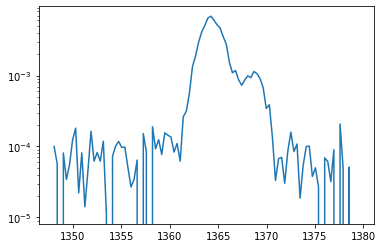

In [29]:
#test plotting
counts = spec.counts_vals
energies = spec.energies_kev
iso_idx = f_near(energies,source_energy[0])
roi_low = iso_idx - 50
roi_high = iso_idx + 50
#plot_counts = spec.counts_vals[roi_low:roi_high]
plot_counts = bgspec.cps_vals[roi_low:roi_high]
plot_energies = spec.energies_kev[roi_low:roi_high]
plt.plot(plot_energies,plot_counts)
#plt.plot(spec.energies_kev,spec.counts_vals)
plt.yscale('log')
np.argmax(counts)
np.sum(plot_counts)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

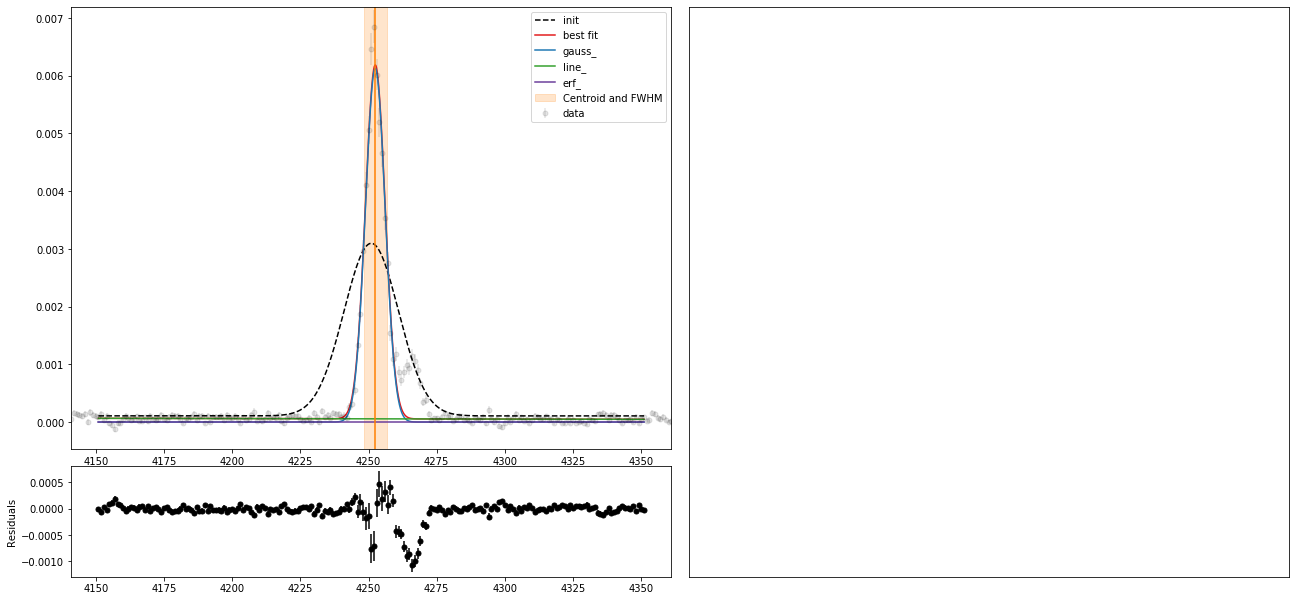

In [30]:
model = ['gauss','line','erf']
fit = bq.core.fitting.Fitter(model, x=bgspec.bin_indices, y=bgspec.cps_vals, y_unc=bgspec.cps_uncs)
fit.set_roi(iso_idx-100, iso_idx+100)
fit.fit()

#fit.results.params.pretty_print()

fit.custom_plot()

In [31]:
fit.result.params.pretty_print()

Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
erf_amp      4.28e-10        0      inf     None     True     None     None
erf_mu           4252     -inf      inf     None    False gauss_mu     None
erf_sigma       3.608     -inf      inf     None    False gauss_sigma     None
gauss_amp     0.05545        0      inf     None     True     None     None
gauss_fwhm      8.497     -inf      inf     None    False 2.3548200450309493 * gauss_sigma     None
gauss_mu         4252     4151     4351     None     True     None     None
gauss_sigma     3.608        0      inf     None     True     None     None
line_b       0.0004359     -inf      inf     None     True     None     None
line_m       -8.929e-08     -inf      inf     None     True     None     None


In [19]:
#calculate integral of fitted Gaussian
amp = fit.result.params['gauss_amp'].value
mu = fit.result.params['gauss_mu'].value
sigma =fit.result.params['gauss_sigma'].value

integral = integrate.quad(gaussian, idx-100, idx+100)
print(integral)

(57966.79400977201, 0.00056368939387841)


In [25]:
sigma_unc = fit.result.params['gauss_sigma'].stderr
print(sigma_unc)
amp_unc = fit.result.params['gauss_amp'].stderr
print(amp_unc)
amp = fit.result.params['gauss_amp'].value + amp_unc
sigma = fit.result.params['gauss_sigma'].value + sigma_unc

integral_up = integrate.quad(gaussian, idx-100, idx+100)
print(integral)

0.019411246561982034
0.0015089696733092582
(57640.8565603372, 0.0007322224263368812)


In [26]:
amp = fit.result.params['gauss_amp'].value - amp_unc
sigma = fit.result.params['gauss_sigma'].value - sigma_unc

integral_low = integrate.quad(gaussian, idx-100, idx+100)
print(integral)

(57640.8565603372, 0.0007322224263368812)


In [28]:
counts_unc = (integral_up[0] - integral_low[0])/2.0
print(counts_unc)

325.93744943480124


In [ ]:
#Now doing it iteratively through all energies
integrals = []

for n in source_energy:
    model = ['gauss','line','erf']
    fit = bq.core.fitting.Fitter(model, x=spec.bin_indices, y=spec.cps_vals, y_unc=spec.cps_uncs)
    idx = f_near(energies,n)
    print(idx)
    fit.set_roi(idx-100, idx+100)
    fit.fit()
    amp = fit.result.params['gauss_amp'].value
    mu = fit.result.params['gauss_mu'].value
    sigma = fit.result.params['gauss_sigma'].value
    integral = integrate.quad(gaussian, idx-100, idx+100)
    integrals.append(integral[0])

print(integrals)

In [ ]:
#Testing 1764
idx = f_near(energies,1764)
print(idx)
plot_counts = spec.counts_vals[idx-40:idx+40]
plot_energies = spec.energies_kev[idx-40:idx+40]
plt.plot(plot_energies,plot_counts)
plt.yscale('log')

In [ ]:
model = ['gauss','line','erf']
fit = bq.core.fitting.Fitter(model, x=spec.bin_indices, y=spec.cps_vals, y_unc=spec.cps_uncs)
idx = f_near(energies,1460)
fit.set_roi(idx-100, idx+100)
fit.fit()

amp = fit.result.params['gauss_amp'].value
mu = fit.result.params['gauss_mu'].value
sigma = fit.result.params['gauss_sigma'].value
integral = integrate.quad(gaussian, idx-100, idx+100)

print()
print(integral)
fit.custom_plot()

In [ ]:
#Testing 2614
idx = f_near(energies,2614)
print(idx)
plot_counts = spec.counts_vals[idx-40:idx+40]
plot_energies = spec.energies_kev[idx-40:idx+40]
plt.plot(plot_energies,plot_counts)
plt.yscale('log')

In [4]:
fit.set_roi(idx-40, idx+40)
fit.fit()
fit.params #type is lmfit.parameter.Parameters
fit.params.pretty_print()
fit.custom_plot()
amp = fit.result.params['gauss_amp'].value
mu = fit.result.params['gauss_mu'].value
sigma = fit.result.params['gauss_sigma'].value
integral = integrate.quad(gaussian, idx-100, idx+100)

print(integral)

NameError: name 'fit' is not defined

In [5]:
source_isotopes = np.array(['K-40','Bi-214','Tl-208']);
source_energy = np.array([1460, 1764, 2614]);
source_activity = np.array([1, 2, 3]);

efficiencies = []
for x in range(0,len(source_activity)):
    iso = bq.Isotope(source_isotopes[x])
    efficiency = integrals[x]/source_activity[x]
    efficiencies = np.append(efficiencies,efficiency)


NameError: name 'integrals' is not defined